# ENEXIS Graduation Project

## CRISP-DM Phase 3: Data Preparation

#### Enexis decentrale opwek data are combined with CBS Zonenstrom dataset. The resulting dataset contains PV installed capacity in years 2016 - 2022. It is then combined with CBS Kerncijfers dataset of 2019. The resulting dataset is cleaned and saved as "PV installed capacity & demographics.csv".

#### Contents

* [Reading of CBS Zonenstrom final dataset](#readcbszon)
* [Reading of Enexis decentrale opwek final dataset](#readenexisdec)
* [Merging CBS Zonenstrom with Enexis decentrale opwek datasets](#mergepv)
* [Reading of CBS Kerncijfers dataset](#readcbs)
* [Merging PV installed capacity with CBS Kerncijfers dataset](#merge)
* [Data cleaning](#clean)
    * [Substitution of 2019 with 2020 values](#subst)
    * [Elimination of buurten with 0 values in more than two consecutive years](#elim)
    * [Eliminating buurten with number of companies per households larger than 1](#elim1)
    * [Eliminating buurten with average PV capacity larger than 10 kWp](#elim2)
    * [Imputation of missing values - PV installations per 100 households](#imput)
    * [Imputation of missing values - Installed capacity per 100 households](#imput1)

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
pd.options.mode.chained_assignment = None  # default='warn'

<a id='readcbszon'></a>
#### Reading of CBS Zonenstrom final dataset

In [2]:
c_path = "./data/"
v_file = "CBS Zonnenstrom final" 

In [3]:
df     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

FileNotFoundError: [Errno 2] No such file or directory: './data/CBS Zonnenstrom final.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46192 entries, 0 to 46191
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                46192 non-null  object 
 1   BU_2021                             46192 non-null  object 
 2   BU_NAAM                             46192 non-null  object 
 3   WK_2021                             46192 non-null  object 
 4   WK_NAAM                             46192 non-null  object 
 5   GM_2021                             46192 non-null  object 
 6   GM_NAAM                             46192 non-null  object 
 7   ProvinciecodePV                     46192 non-null  object 
 8   Provincienaam                       46192 non-null  object 
 9   AantalInstallatiesBijWoningen_5     46192 non-null  float64
 10  OpgesteldVermogenVanZonnepanelen_6  46192 non-null  float64
dtypes: float64(2), object(9)
memory usage: 3.

<a id='readenexisdec'></a>
#### Reading of Enexis decentrale opwek final dataset

In [ ]:
v_file = "Enexis decentrale opwek final" 

In [ ]:
df1     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16863 entries, 0 to 16862
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       16863 non-null  object 
 1   BU_2021                                    16863 non-null  object 
 2   BU_NAAM                                    16863 non-null  object 
 3   WK_2021                                    16863 non-null  object 
 4   WK_NAAM                                    16863 non-null  object 
 5   GM_2021                                    16863 non-null  object 
 6   GM_NAAM                                    16863 non-null  object 
 7   ProvinciecodePV                            16863 non-null  object 
 8   Provincienaam                              16863 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  16863 non-null  float64
 10  Opgesteld vermogen    

<a id='mergepv'></a>
#### Merging CBS Zonenstrom with Enexis decentrale opwek datasets

In [ ]:
BU_list = df1['BU_2021'].tolist() # list of Buurts which are in Enexis remit

In [ ]:
df = df[df['BU_2021'].isin(BU_list)] # only buurts which are in Enexis remit

In [ ]:
df.columns = df1.columns # make sure column names are the same

In [ ]:
df = pd.concat([df, df1], ignore_index=True)

In [ ]:
df.shape

(32020, 11)

In [ ]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,1426.0
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,1068.0
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,726.0
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,504.0
4,2019-01-01,BU16800009,Verspreide huizen Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,12.0,50.0


In [ ]:
df['Provincienaam'].value_counts()

Noord-Brabant    11555
Overijssel        6975
Limburg           6645
Drenthe           4307
Groningen         2538
Name: Provincienaam, dtype: int64

In [ ]:
df['GM_NAAM'].value_counts().nlargest(5)

Groningen    833
Venlo        781
Oss          751
Tilburg      737
Assen        725
Name: GM_NAAM, dtype: int64

In [ ]:
df['Year'].value_counts()

2019-01-01    4271
2022-01-01    4204
2018-01-01    3913
2017-01-01    3681
2020-01-01    3306
2016-01-01    3292
2021-07-01    3167
2021-01-01    3121
2020-07-01    3065
Name: Year, dtype: int64

In [ ]:
type(df['Year'][0]) # year is of string type. Consider changing it to datetime

str

<a id='readcbs'></a>
#### Reading of CBS Kerncijfers dataset

In [ ]:
v_file = "CBS_Kerncijfers2019_intermediate_dataset"

In [ ]:
df1     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [ ]:
df1.head(5).transpose()

,0,1,2,3,4
WijkenEnBuurten,Annen,Verspreide huizen Annen,Eext,Verspreide huizen Eext,Anloo
Gemeentenaam_1,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Buurt,Buurt,Buurt,Buurt,Buurt
Codering_3,BU16800000,BU16800009,BU16800100,BU16800109,BU16800200
MeestVoorkomendePostcode_113,9468,9468,9463,9463,9467
HuishoudensTotaal_28,1490,65,535,90,145
GemiddeldeHuishoudensgrootte_32,2.3,2.3,2.3,1.9,2.2
Bevolkingsdichtheid_33,1367.0,12.0,730.0,11.0,578.0
Woningvoorraad_34,1552,63,534,50,145
GemiddeldeWoningwaarde_35,241.0,426.0,241.0,353.0,292.0


In [ ]:
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

<a id='merge'></a>
#### Merging PV installed capacity with CBS Kerncijfers dataset

In [ ]:
df = df.merge(df1, left_on = 'BU_2021', right_on = 'Codering_3', how = 'inner')

<a id='descr'></a>
#### Data description

Removing unnecessary columns

In [ ]:
df = df.drop(columns = ['Codering_3', 'Gemeentenaam_1', 'SoortRegio_2', 'WijkenEnBuurten'], axis =1)

Defining auxiliary features

In [ ]:
df['OV_per_installatie'] = df['Opgesteld vermogen'] / df['Aantal aansluitingen met opwekinstallatie'] 

In [ ]:
df['Opgesteld_vermogen_per100houshoudens'] = 100 * df['Opgesteld vermogen'] / df['HuishoudensTotaal_28']

In [ ]:
df['PVinstallaties_per100houshoudens'] = 100 * df['Aantal aansluitingen met opwekinstallatie'] / df['HuishoudensTotaal_28']

In [ ]:
df.head().transpose()

,0,1,2,3,4
Year,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01
BU_2021,BU16800000,BU16800000,BU16800000,BU16800000,BU16800000
BU_NAAM,Annen,Annen,Annen,Annen,Annen
WK_2021,WK168000,WK168000,WK168000,WK168000,WK168000
WK_NAAM,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen
GM_2021,GM1680,GM1680,GM1680,GM1680,GM1680
GM_NAAM,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
ProvinciecodePV,PV22,PV22,PV22,PV22,PV22
Provincienaam,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe
Aantal aansluitingen met opwekinstallatie,396.0,308.0,191.0,128.0,392.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       18520 non-null  object 
 1   BU_2021                                    18520 non-null  object 
 2   BU_NAAM                                    18520 non-null  object 
 3   WK_2021                                    18520 non-null  object 
 4   WK_NAAM                                    18520 non-null  object 
 5   GM_2021                                    18520 non-null  object 
 6   GM_NAAM                                    18520 non-null  object 
 7   ProvinciecodePV                            18520 non-null  object 
 8   Provincienaam                              18520 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  18520 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,18520,9,2019-01-01,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_2021,18520,2096,BU16900809,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,18520,2050,Centrum,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_2021,18520,716,WK085601,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_NAAM,18520,711,Wijk 00 Haaksbergen (dorp),135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_2021,18520,103,GM0983,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_NAAM,18520,103,Venlo,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProvinciecodePV,18520,5,PV30,5470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincienaam,18520,5,Noord-Brabant,5470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,18520.0,NaN,NaN,NaN,111.747192,144.55832,0.0,23.0,60.0,143.0,1656.0


In [ ]:
df.isna().sum()

Year                                            0
BU_2021                                         0
BU_NAAM                                         0
WK_2021                                         0
WK_NAAM                                         0
GM_2021                                         0
GM_NAAM                                         0
ProvinciecodePV                                 0
Provincienaam                                   0
Aantal aansluitingen met opwekinstallatie       0
Opgesteld vermogen                              0
MeestVoorkomendePostcode_113                    0
HuishoudensTotaal_28                            0
GemiddeldeHuishoudensgrootte_32                 0
Bevolkingsdichtheid_33                          0
Woningvoorraad_34                               0
GemiddeldeWoningwaarde_35                    1775
PercentageEengezinswoning_36                    8
Koopwoningen_40                                 8
InBezitWoningcorporatie_42                      8


Strange thing is, that there are no gaps in "Aantal aansluitingen met opwekinstallatie" nor "Opgesteld vermogen", but there are nan's in "OV_per_installatie". Possible explanation could be presence of 0 values among "Aantal ansluitingen". To be investigated.

In [ ]:
df[df['OV_per_installatie'].isna()].head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,GemiddeldInkomenPerInwoner_72,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,OV_per_installatie,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
55,2018-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
56,2017-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
57,2016-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
65,2017-01-01,BU16800500,Schipborg,WK168005,Wijk 05 Schipborg,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,2.439024,0.934579,32.7,0.215686,1.5,1.0,5.0,NaN,0.0,0.0
66,2016-01-01,BU16800500,Schipborg,WK168005,Wijk 05 Schipborg,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,2.439024,0.934579,32.7,0.215686,1.5,1.0,5.0,NaN,0.0,0.0


In [ ]:
df[df['OV_per_installatie'].isna()]['Aantal aansluitingen met opwekinstallatie'].value_counts()

0.0    649
Name: Aantal aansluitingen met opwekinstallatie, dtype: int64

Indeed, all of the nan's result from 0 values if "Aantal aanslutingen.." column. We can therefore replace these nan's with 0.

In [ ]:
df['OV_per_installatie'] = df['OV_per_installatie'].fillna(0)

<AxesSubplot:>

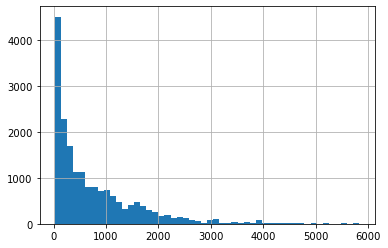

In [ ]:
df['HuishoudensTotaal_28'].hist(bins  = 50)

In [ ]:
df_lessthan50 = df[df['HuishoudensTotaal_28']<50]
df_lessthan50.T

,90,91,92,93,94,95,96,97,98,225,...,17950,18323,18324,18325,18326,18327,18328,18329,18330,18331
Year,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01,2019-01-01,...,2020-01-01,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01
BU_2021,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16801903,...,BU16901104,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210
BU_NAAM,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Deurze,...,Weerwille,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte
WK_2021,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168019,...,WK169011,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332
WK_NAAM,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 19 Rolde,...,Wijk 11 Ruinerwold,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden
GM_2021,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,...,GM1690,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193
GM_NAAM,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,...,De Wolden,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle
ProvinciecodePV,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,...,PV22,PV23,PV23,PV23,PV23,PV23,PV23,PV23,PV23,PV23
Provincienaam,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,...,Drenthe,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel
Aantal aansluitingen met opwekinstallatie,0.0,0.0,0.0,0.0,10.0,10.0,11.0,11.0,23.0,11.0,...,19.0,10.0,9.0,6.0,6.0,13.0,15.0,18.0,21.0,19.0


In [ ]:
df_lessthan50.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,710,9,2019-01-01,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_2021,710,93,BU16800800,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,710,91,Verspreide huizen,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_2021,710,86,WK010910,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_NAAM,710,86,Wijk 10 Coevorden,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_2021,710,43,GM0109,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_NAAM,710,43,Coevorden,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProvinciecodePV,710,5,PV22,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincienaam,710,5,Drenthe,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,710.0,NaN,NaN,NaN,10.564789,8.610562,0.0,4.0,10.0,15.0,42.0


Let's check for anomalies, like the number of PV installations higher than the number of households in the buurt

In [ ]:
df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']].T

,903,904,905,906,2673,4580,4581,4582,6536,6539,...,13888,13889,15414,15415,15930,16731,16732,16733,17274,17275
Year,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2020-01-01,2021-07-01,...,2021-07-01,2022-01-01,2021-01-01,2021-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2021-01-01,2021-07-01
BU_2021,BU08890109,BU08890109,BU08890109,BU08890109,BU01093068,BU01140709,BU01140709,BU01140709,BU17290009,BU17290009,...,BU16740800,BU16740800,BU17300909,BU17300909,BU00470109,BU09860900,BU09860900,BU09860900,BU17010309,BU17010309
BU_NAAM,Verspreide huizen,Verspreide huizen,Verspreide huizen,Verspreide huizen,Verspreide huizen Nieuwlande,Verspreide huizen Erica,Verspreide huizen Erica,Verspreide huizen Erica,Verspreide huizen,Verspreide huizen,...,Borchwerf-Noord,Borchwerf-Noord,Verspreide huizen Vries,Verspreide huizen Vries,Verspreide huizen,Verspreide huizen Voerendaal,Verspreide huizen Voerendaal,Verspreide huizen Voerendaal,Verspreide huizen Dwingeloo,Verspreide huizen Dwingeloo
WK_2021,WK088901,WK088901,WK088901,WK088901,WK010930,WK011407,WK011407,WK011407,WK172900,WK172900,...,WK167408,WK167408,WK173009,WK173009,WK004701,WK098609,WK098609,WK098609,WK170103,WK170103
WK_NAAM,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 30 Oosterhesselen,Wijk 07 Erica,Wijk 07 Erica,Wijk 07 Erica,Wijk 00 Gulpen,Wijk 00 Gulpen,...,Wijk 08 Industriegebieden,Wijk 08 Industriegebieden,Wijk 09 Vries,Wijk 09 Vries,Wijk 01 Veendam-buitengebied,Wijk 09 Verspreide huizen Voerendaal,Wijk 09 Verspreide huizen Voerendaal,Wijk 09 Verspreide huizen Voerendaal,Wijk 03 Dwingeloo,Wijk 03 Dwingeloo
GM_2021,GM0889,GM0889,GM0889,GM0889,GM0109,GM0114,GM0114,GM0114,GM1729,GM1729,...,GM1674,GM1674,GM1730,GM1730,GM0047,GM0986,GM0986,GM0986,GM1701,GM1701
GM_NAAM,Beesel,Beesel,Beesel,Beesel,Coevorden,Emmen,Emmen,Emmen,Gulpen-Wittem,Gulpen-Wittem,...,Roosendaal,Roosendaal,Tynaarlo,Tynaarlo,Veendam,Voerendaal,Voerendaal,Voerendaal,Westerveld,Westerveld
ProvinciecodePV,PV31,PV31,PV31,PV31,PV22,PV22,PV22,PV22,PV31,PV31,...,PV30,PV30,PV22,PV22,PV20,PV31,PV31,PV31,PV22,PV22
Provincienaam,Limburg,Limburg,Limburg,Limburg,Drenthe,Drenthe,Drenthe,Drenthe,Limburg,Limburg,...,Noord-Brabant,Noord-Brabant,Drenthe,Drenthe,Groningen,Limburg,Limburg,Limburg,Drenthe,Drenthe
Aantal aansluitingen met opwekinstallatie,59.0,75.0,81.0,93.0,33.0,102.0,109.0,111.0,116.0,52.0,...,39.0,42.0,27.0,30.0,119.0,150.0,165.0,178.0,57.0,64.0


We can see that 28 columns (buurt and year combinations) the number of PV installations is higher than the number of households. This is an anomaly that requires handling.

In [ ]:
df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']]['HuishoudensTotaal_28'].mean()

59.82142857142857

We can see that this happens typically in buurten where the number of households is quite low, with an average of around 60.

<a id='clean'></a>
#### Data cleaning

In order to keep the uniform distance between time points, records at mid-year are removed

In [ ]:
df = df.drop(df[df['Year'].isin(['2021-07-01', '2020-07-01'])].index)

Format of the date is changed to simply 4 digit year

In [ ]:
df['Year'] = df['Year'].apply(lambda x: x[:4])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14457 entries, 0 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       14457 non-null  object 
 1   BU_2021                                    14457 non-null  object 
 2   BU_NAAM                                    14457 non-null  object 
 3   WK_2021                                    14457 non-null  object 
 4   WK_NAAM                                    14457 non-null  object 
 5   GM_2021                                    14457 non-null  object 
 6   GM_NAAM                                    14457 non-null  object 
 7   ProvinciecodePV                            14457 non-null  object 
 8   Provincienaam                              14457 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  14457 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,GemiddeldInkomenPerInwoner_72,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,OV_per_installatie,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2019,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.601010,95.704698,26.577181
1,2018,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.467532,71.677852,20.671141
2,2017,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.801047,48.724832,12.818792
3,2016,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.937500,33.825503,8.590604
4,2020,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,4.109694,108.120805,26.308725


Now, we shall handle missing values

In [ ]:
df.isna().sum()

Year                                            0
BU_2021                                         0
BU_NAAM                                         0
WK_2021                                         0
WK_NAAM                                         0
GM_2021                                         0
GM_NAAM                                         0
ProvinciecodePV                                 0
Provincienaam                                   0
Aantal aansluitingen met opwekinstallatie       0
Opgesteld vermogen                              0
MeestVoorkomendePostcode_113                    0
HuishoudensTotaal_28                            0
GemiddeldeHuishoudensgrootte_32                 0
Bevolkingsdichtheid_33                          0
Woningvoorraad_34                               0
GemiddeldeWoningwaarde_35                    1408
PercentageEengezinswoning_36                    6
Koopwoningen_40                                 6
InBezitWoningcorporatie_42                      6


<AxesSubplot:>

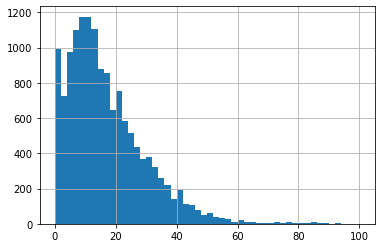

In [ ]:
df['PVinstallaties_per100houshoudens'].hist(bins = 50, range=(0, 100))

<AxesSubplot:>

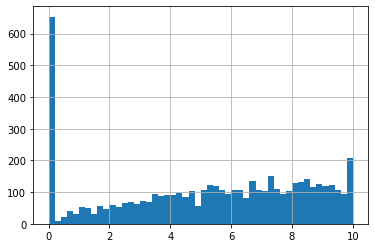

In [ ]:
df['PVinstallaties_per100houshoudens'].hist(bins = 50, range=(0, 10))

The records with 0 values require a deeper look to check for the presence of "false" 0's among them. But first, we shall check if the data for subsequent years are complete per buurt, i.e. no missing values there.

In [ ]:
df_pivot = df.pivot_table(index='BU_2021', 
                        columns='Year', 
                        values='PVinstallaties_per100houshoudens')

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, BU00140000 to BU19030509
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    2096 non-null   float64
 1   2017    2096 non-null   float64
 2   2018    2096 non-null   float64
 3   2019    2096 non-null   float64
 4   2020    1959 non-null   float64
 5   2021    2036 non-null   float64
 6   2022    2077 non-null   float64
dtypes: float64(7)
memory usage: 131.0+ KB


In [ ]:
df_pivot

Year,2016,2017,2018,2019,2020,2021,2022
BU_2021,,,,,,,
BU00140000,0.903955,1.186441,0.000000,1.779661,2.175141,3.022599,3.361582
BU00140001,0.440191,0.688995,0.899522,1.110048,1.358852,1.913876,2.430622
BU00140002,0.865385,0.000000,1.250000,1.570513,1.762821,2.660256,3.333333
BU00140003,0.782918,0.782918,1.067616,0.000000,1.209964,1.423488,1.708185
BU00140100,4.688995,5.263158,5.933014,8.229665,8.229665,9.952153,11.961722
...,...,...,...,...,...,...,...
BU19030500,9.113924,11.139241,0.000000,20.000000,21.518987,26.582278,30.886076
BU19030501,8.148148,11.358025,13.580247,16.543210,17.777778,22.469136,28.395062
BU19030502,8.235294,10.588235,11.764706,15.294118,15.000000,17.647059,24.117647


It is visible that there are some nan's, but also some 0's in between positive values as well!

In [ ]:
df_pivot.isna().sum()

Year
2016      0
2017      0
2018      0
2019      0
2020    137
2021     60
2022     19
dtype: int64

In [ ]:
df_nans = df_pivot[df_pivot.isnull().any(axis=1)]
df_nans.head()

Year,2016,2017,2018,2019,2020,2021,2022
BU_2021,,,,,,,
BU00140705,0.0,0.0,0.0,0.0,NaN,76.0,48.0
BU00140805,16.0,12.0,24.0,24.0,60.0,76.0,NaN
BU00140809,0.0,5.0,5.0,5.0,NaN,NaN,15.0
BU00140905,12.5,12.5,15.0,17.5,NaN,30.0,NaN
BU00141106,0.0,16.0,16.0,0.0,NaN,88.0,56.0


In [ ]:
df_nans.shape[0]

151

It is strange that for some buurten the value for 2022 is smaller than for 2021 (actually it seems to be the rule for this selection of records!). 

In [ ]:
df_nans[df_nans['2022'] < df_nans['2021']]

Year,2016,2017,2018,2019,2020,2021,2022
BU_2021,,,,,,,
BU00140705,0.000000,0.000000,0.000000,0.000000,NaN,76.000000,48.000000
BU00141106,0.000000,16.000000,16.000000,0.000000,NaN,88.000000,56.000000
BU01093037,10.000000,10.000000,10.000000,14.000000,NaN,62.000000,30.000000
BU01140806,0.000000,6.000000,10.000000,12.000000,NaN,26.000000,24.000000
BU01141001,10.666667,10.666667,10.666667,10.666667,NaN,28.000000,26.666667
BU01530904,2.068966,2.758621,5.517241,7.586207,NaN,28.275862,13.103448
BU01580690,7.272727,7.272727,9.090909,0.000000,NaN,29.090909,25.454545
BU01630603,2.222222,2.222222,2.222222,5.185185,NaN,17.037037,8.148148
BU07581009,0.000000,16.000000,16.000000,18.000000,NaN,76.000000,34.000000


In [ ]:
df_nans[df_nans['2022'] < df_nans['2021']].shape[0]

29

In [ ]:
df_pivot[df_pivot['2022'] < df_pivot['2021']].shape[0]

248

It seems there are more examples where value for 2022 is lower than 2021. A hypothesis can be that 2022 data are incomplete. Would it be better to remove 2022 altogether?

In [ ]:
df_pivot[df_pivot['2021'] < df_pivot['2020']].shape[0]

104

In [ ]:
df_pivot[df_pivot['2020'] < df_pivot['2019']].shape[0]

808

In [ ]:
df_pivot[df_pivot['2020'] < df_pivot['2019']].shape[0] / df_pivot.shape[0]

0.38549618320610685

The number is shockingly high! It is almost 40% of all the records. Let's view these records.

In [ ]:
df_pivot[df_pivot['2020'] < df_pivot['2019']].head()

Year,2016,2017,2018,2019,2020,2021,2022
BU_2021,,,,,,,
BU00140103,0.326409,0.415430,0.593472,2.106825,1.839763,3.026706,3.590504
BU00140105,1.438849,1.726619,1.870504,3.741007,3.309353,6.906475,8.345324
BU00140107,1.136364,1.477273,1.931818,2.386364,2.159091,3.409091,4.886364
BU00140200,4.034582,4.841499,5.302594,6.570605,6.340058,7.377522,8.069164
BU00140201,3.383459,4.210526,5.112782,6.428571,6.315789,8.609023,10.112782


The differences are not large, and there is a certain regularity there. It happens between 2019 and 2020, which are exactly when datasets from two sources, CBS and Enexis, come together. It is an important observation. Apparently, Enexis set seems to contain lower values. 

In [ ]:
df_pivot[df_pivot['2019'] < df_pivot['2018']].shape[0]

55

In [ ]:
df_pivot[df_pivot['2018'] < df_pivot['2017']].shape[0]

95

In [ ]:
df_pivot[df_pivot['2017'] < df_pivot['2016']].shape[0]

42

After looking into the description of the datasets, it becomes clear that CBS set denominated as a certain year contains data from the end of this year, while the Enexis set contains data from the exact date which is either 1.01. or 1.07. of a given year. This means that CBS data of 2019 are essentially from the same point of time as Enexis set of 2020 (1.01.2020). Therefore, one of these sets is superfluous, and we may want to remove one of them. First, let's compare the sets of 2019 and 2020.

In [ ]:
df_pivot['PV_diff'] = df_pivot['2020'] - df_pivot['2019']

<AxesSubplot:xlabel='BU_2021', ylabel='PV_diff'>

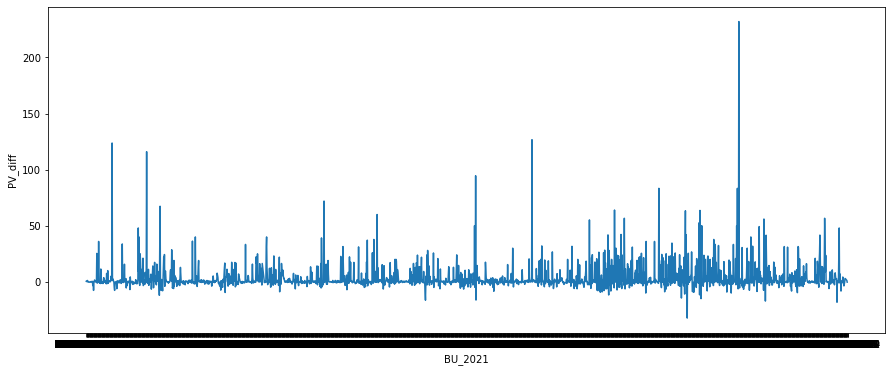

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(data = df_pivot, x = df_pivot.index, y = df_pivot['PV_diff'])

In [ ]:
df_pivot['PV_diff'].describe()

count    1959.000000
mean        3.625850
std        12.121930
min       -32.307692
25%        -0.674157
50%         0.207792
75%         3.076923
max       232.000000
Name: PV_diff, dtype: float64

In [ ]:
df_pivot['PV_diff'].median()

0.20779220779220964

We can see that while the mean median value of the difference between 2019 and 2020 is relatively high (3.62), the median is very low (0.21). This can indicate that in reality these two sets do refer to the same moment in time, and the high mean difference results from outliers (for example we can see some values higher than 100 on the chart)

In [ ]:
df_pivot.describe()

Year,2016,2017,2018,2019,2020,2021,2022,PV_diff
count,2096.000000,2096.000000,2096.000000,2096.000000,1959.000000,2036.000000,2077.000000,1959.000000
mean,6.865007,9.144741,11.929194,16.109579,20.001025,25.499559,29.928895,3.625850
std,5.194599,6.449215,7.762773,9.214280,14.075502,15.537207,12.838688,12.121930
min,0.000000,0.000000,0.000000,0.000000,0.292943,0.665779,0.612517,-32.307692
25%,3.186569,4.699625,6.831063,10.076296,11.709052,15.588235,21.694915,-0.674157
50%,6.315789,8.554007,11.111111,15.278638,17.614679,23.044918,30.275229,0.207792
75%,9.523810,12.388124,16.256378,21.432540,24.801961,31.434024,37.500000,3.076923
max,44.000000,72.307692,85.846154,86.153846,232.000000,147.272727,140.000000,232.000000


In [ ]:
df_pivot[df_pivot['2018'] == 0]['2018'].count()

144

In [ ]:
df_pivot[df_pivot['2019'] == 0]['2019'].count()

92

In [ ]:
df_pivot[df_pivot['2020'] == 0]['2020'].count()

0

In [ ]:
df_pivot[df_pivot['2019'].isna()]['2019']#.count()

Series([], Name: 2019, dtype: float64)

In [ ]:
df_pivot[df_pivot['2020'].isna()]['2020']#.count()

BU_2021
BU00140705   NaN
BU00140809   NaN
BU00140905   NaN
BU00141106   NaN
BU00470202   NaN
              ..
BU19030205   NaN
BU19030403   NaN
BU19030409   NaN
BU19030504   NaN
BU19030509   NaN
Name: 2020, Length: 137, dtype: float64

<a id='subst'></a>
#### Substitution of 2019 with 2020 values

Contrary to 2019 set, in 2020 set there are no 0 values but multiple nan's. This can be the reason of the high number of points where the difference between 2020 and 2019 is high. As a major cleaning step now, we shall replace values of 2019 with values of 2020 (i.e. replace CBS data for 2019 with Enexis data of 1.01.2020), and then 2020 values with 2021 and 2021 values with 2022. In this way, all values in the dataset will refer to end of a year.

In [ ]:
df_pivot['2019'] = df_pivot['2020']

In [ ]:
df_pivot['2020'] = df_pivot['2021']

In [ ]:
df_pivot['2021'] = df_pivot['2022']

In [ ]:
df_pivot = df_pivot.drop(['2022', 'PV_diff'], axis = 1)

In [ ]:
df_pivot.describe()

Year,2016,2017,2018,2019,2020,2021
count,2096.000000,2096.000000,2096.000000,1959.000000,2036.000000,2077.000000
mean,6.865007,9.144741,11.929194,20.001025,25.499559,29.928895
std,5.194599,6.449215,7.762773,14.075502,15.537207,12.838688
min,0.000000,0.000000,0.000000,0.292943,0.665779,0.612517
25%,3.186569,4.699625,6.831063,11.709052,15.588235,21.694915
50%,6.315789,8.554007,11.111111,17.614679,23.044918,30.275229
75%,9.523810,12.388124,16.256378,24.801961,31.434024,37.500000
max,44.000000,72.307692,85.846154,232.000000,147.272727,140.000000


Now, we will investigate the dataset again and handle nan's and 0 values that remain.

In [ ]:
df_pivot.isna().sum()

Year
2016      0
2017      0
2018      0
2019    137
2020     60
2021     19
dtype: int64

Firstly, we shall replace all nan's with 0, so that we can directly compare them with 0's in previous years

In [ ]:
df_pivot = df_pivot.fillna(0)

We do the same for the original dataset df as well.

In [ ]:
df = df.drop(df[df['Year'] == '2019'].index)

In [ ]:
df['Year'] = df['Year'].map({'2016': '2016', '2017': '2017', '2018': '2018', '2020': '2019', '2021': '2020', '2022': '2021'})

In [ ]:
df['Year'].value_counts()

2018    2096
2017    2096
2016    2096
2021    2077
2020    2036
2019    1960
Name: Year, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12361 entries, 1 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       12361 non-null  object 
 1   BU_2021                                    12361 non-null  object 
 2   BU_NAAM                                    12361 non-null  object 
 3   WK_2021                                    12361 non-null  object 
 4   WK_NAAM                                    12361 non-null  object 
 5   GM_2021                                    12361 non-null  object 
 6   GM_NAAM                                    12361 non-null  object 
 7   ProvinciecodePV                            12361 non-null  object 
 8   Provincienaam                              12361 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  12361 non-null  float64
 10  Opgesteld vermogen    

Our task is now to detect false 0's and handle them, i.e. impute or eliminate. Let's apply the following set of principles:
- 0's which appear in year 2016 and consecutive years for the same buurt are true 0's, i.e. the real number of PV installations is 0
- when a positive value appears in 2016 or one of the years after, any 0 which appears after a positive value is considered a false 0, based on an assumption that the number of PV's can only grow and never goes back to 0
- when two or more consecutive false 0's appear, the uncertainty of data for a given buurt is considered too high and the whole buurt is removed from the dataset
- all other (single) false 0's will be imputed using KNN imputation method.

<a id='elim'></a>
#### Elimination of buurten with 0 values in more than two consecutive years

Let's start by eliminating buurten with 0 values in two or more consecutive years

In [ ]:
df_pivot.head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,0.000000,2.175141,3.022599,3.361582
BU00140001,0.440191,0.688995,0.899522,1.358852,1.913876,2.430622
BU00140002,0.865385,0.000000,1.250000,1.762821,2.660256,3.333333
BU00140003,0.782918,0.782918,1.067616,1.209964,1.423488,1.708185
BU00140100,4.688995,5.263158,5.933014,8.229665,9.952153,11.961722


In [ ]:
# Saving buurten with 0 values in two or more consecutive years into a list "invalid_buurten"
invalid_buurten = []
for col in range(1,5):
    elements = df_pivot[(df_pivot['2016'] > 0) & (df_pivot.iloc[:,col] == 0) & (df_pivot.iloc[:,col+1] == 0)]
    invalid_buurten.extend(elements.index.tolist())
invalid_buurten = list(set(invalid_buurten))

In [ ]:
invalid_buurten

['BU01750801',
 'BU19030403',
 'BU16900400',
 'BU17010301',
 'BU01640002',
 'BU08240601',
 'BU17311602',
 'BU17060200',
 'BU17310201',
 'BU01186002',
 'BU07971100',
 'BU09350300',
 'BU18951001',
 'BU09380009',
 'BU17300300',
 'BU16901103',
 'BU01731000',
 'BU09350001',
 'BU01660500',
 'BU09350302',
 'BU01680001',
 'BU01140106',
 'BU16801903',
 'BU17350309',
 'BU09882501',
 'BU17310802',
 'BU07530005',
 'BU08091015',
 'BU17010500',
 'BU01140408',
 'BU07970800',
 'BU16990340',
 'BU17311001',
 'BU16901201',
 'BU09860201',
 'BU01091006',
 'BU17110414',
 'BU01800000',
 'BU07560601',
 'BU01069911',
 'BU01800001',
 'BU16590100',
 'BU19030205',
 'BU17310500',
 'BU09860404',
 'BU01185501',
 'BU07970700']

In [ ]:
df = df.drop(df[df['BU_2021'].isin(invalid_buurten)].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12158 entries, 1 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       12158 non-null  object 
 1   BU_2021                                    12158 non-null  object 
 2   BU_NAAM                                    12158 non-null  object 
 3   WK_2021                                    12158 non-null  object 
 4   WK_NAAM                                    12158 non-null  object 
 5   GM_2021                                    12158 non-null  object 
 6   GM_NAAM                                    12158 non-null  object 
 7   ProvinciecodePV                            12158 non-null  object 
 8   Provincienaam                              12158 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  12158 non-null  float64
 10  Opgesteld vermogen    

<AxesSubplot:>

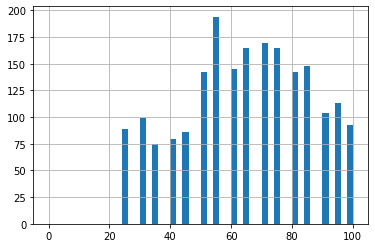

In [ ]:
df['HuishoudensTotaal_28'].hist(bins = 50, range=(0, 100))

<AxesSubplot:>

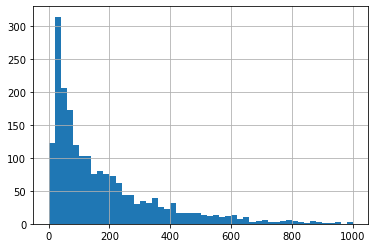

In [ ]:
df[df['Year'] == '2021']['Aantal aansluitingen met opwekinstallatie'].hist(bins = 50, range=(0, 1000))

We can see that the number of records is now reduced. We create the same pivot once again.

In [ ]:
df_pivot = df.pivot_table(index='BU_2021', 
                        columns='Year', 
                        values='PVinstallaties_per100houshoudens')

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, BU00140000 to BU19030509
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    2049 non-null   float64
 1   2017    2049 non-null   float64
 2   2018    2049 non-null   float64
 3   2019    1951 non-null   float64
 4   2020    2028 non-null   float64
 5   2021    2031 non-null   float64
dtypes: float64(6)
memory usage: 112.1+ KB


In [ ]:
df_pivot = df_pivot.fillna(0)

In [ ]:
df_pivot[(df_pivot == 0).any(axis=1)].head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,0.00,2.175141,3.022599,3.361582
BU00140002,0.865385,0.000000,1.25,1.762821,2.660256,3.333333
BU00140701,0.000000,0.000000,0.00,7.122153,10.600414,14.824017
BU00140705,0.000000,0.000000,0.00,0.000000,76.000000,48.000000
BU00140800,3.146067,4.269663,0.00,8.202247,9.325843,15.168539


<a id='elim1'></a>
#### Eliminating buurten with number of companies per households larger than 1

In [ ]:
df = df.drop(df[df['Bedrijfsvestigingen_per_huishuidens'] > 1].index)

<a id='elim2'></a>
#### Eliminating buurten with average PV capacity larger than 10 kWp

In [ ]:
PV_above_10 = df[(df['Year'] == '2021') & (df['OV_per_installatie'] > 10)]['BU_2021'].to_list()

In [ ]:
df = df.drop(df[df['BU_2021'].isin(PV_above_10)].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10889 entries, 1 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       10889 non-null  object 
 1   BU_2021                                    10889 non-null  object 
 2   BU_NAAM                                    10889 non-null  object 
 3   WK_2021                                    10889 non-null  object 
 4   WK_NAAM                                    10889 non-null  object 
 5   GM_2021                                    10889 non-null  object 
 6   GM_NAAM                                    10889 non-null  object 
 7   ProvinciecodePV                            10889 non-null  object 
 8   Provincienaam                              10889 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  10889 non-null  float64
 10  Opgesteld vermogen    

<a id='imput'></a>
#### Imputation of missing values - PV installations per 100 households

First, we need to identify false 0's and replace them back with nan. The condition is that in preceding year the value is different than 0.

In [ ]:
for col in range(0,5):
    print(df_pivot[(df_pivot.iloc[:,col] > 0) & (df_pivot.iloc[:,col+1] == 0)])

Year             2016  2017       2018       2019       2020       2021
BU_2021                                                                
BU00140002   0.865385   0.0   1.250000   1.762821   2.660256   3.333333
BU00140810  17.500000   0.0  24.107143  32.142857  40.178571  50.714286
BU01060402   9.076923   0.0  14.769231  17.230769  20.923077  25.230769
BU01060702  21.363636   0.0  34.090909  36.363636  45.909091  51.818182
BU01092024   9.090909   0.0  20.909091  30.909091  36.363636  40.909091
BU01580290   2.857143   0.0   3.673469  20.816327  19.183673  23.265306
BU01890109   8.000000   0.0  11.000000  22.000000  28.000000  32.000000
BU07480508   8.571429   0.0  15.714286  20.000000  28.571429  34.285714
BU07941601   7.000000   0.0  14.666667  21.000000  23.500000  31.666667
BU08200002   6.666667   0.0  11.992110  15.936884  22.564103  31.913215
BU08470209   7.142857   0.0  17.142857  30.476190  38.571429  38.095238
BU08510002  10.476190   0.0  13.928571  16.607143  21.309524  28

For 2021, in many cases there are 0 values in years 2016-2019. Because with only one value present, for 2020, it is not reliable to impute value for 2021, these buurten have to be removed

In [ ]:
invalid_buurten2 = df_pivot[
         (df_pivot.iloc[:,0] == 0) & 
         (df_pivot.iloc[:,1] == 0) &
         (df_pivot.iloc[:,2] == 0) &
         (df_pivot.iloc[:,3] == 0) &
         (df_pivot.iloc[:,4] > 0) &
         (df_pivot.iloc[:,5] == 0)
         ].index.tolist()

In [ ]:
invalid_buurten2

['BU01069908',
 'BU01580590',
 'BU08261209',
 'BU08650209',
 'BU09570304',
 'BU09810009',
 'BU17300909']

In [ ]:
df = df.drop(df[df['BU_2021'].isin(invalid_buurten2)].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 1 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       10865 non-null  object 
 1   BU_2021                                    10865 non-null  object 
 2   BU_NAAM                                    10865 non-null  object 
 3   WK_2021                                    10865 non-null  object 
 4   WK_NAAM                                    10865 non-null  object 
 5   GM_2021                                    10865 non-null  object 
 6   GM_NAAM                                    10865 non-null  object 
 7   ProvinciecodePV                            10865 non-null  object 
 8   Provincienaam                              10865 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  10865 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df_pivot = df.pivot_table(index='BU_2021', 
                        columns='Year', 
                        values='PVinstallaties_per100houshoudens')

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, BU00140000 to BU19030509
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    1826 non-null   float64
 1   2017    1826 non-null   float64
 2   2018    1826 non-null   float64
 3   2019    1761 non-null   float64
 4   2020    1809 non-null   float64
 5   2021    1816 non-null   float64
dtypes: float64(6)
memory usage: 99.9+ KB


In [ ]:
df_pivot[(df_pivot == 0).any(axis=1)].head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,0.00,2.175141,3.022599,3.361582
BU00140002,0.865385,0.000000,1.25,1.762821,2.660256,3.333333
BU00140701,0.000000,0.000000,0.00,7.122153,10.600414,14.824017
BU00140705,0.000000,0.000000,0.00,NaN,76.000000,48.000000
BU00140800,3.146067,4.269663,0.00,8.202247,9.325843,15.168539


As preparation for imputation, we will create a list of buurten, which contains 0 values which are in reality nan's and will be replaced by nan.

In [ ]:
valid_buurten = []
for col in range(0,5):
#    print(df_pivot[(df_pivot.iloc[:,col] > 0) & (df_pivot.iloc[:,col+1] == 0)])
    elements1 = df_pivot[(df_pivot.iloc[:,col] > 0) & (df_pivot.iloc[:,col+1] == 0)]
    valid_buurten.extend(elements1.index.tolist())
valid_buurten = list(set(valid_buurten))

In [ ]:
# Subset of the df_pivot containing only false 0's (no true 0's)

df_pivot[df_pivot.index.isin(valid_buurten)]

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,0.000000,2.175141,3.022599,3.361582
BU00140002,0.865385,0.000000,1.250000,1.762821,2.660256,3.333333
BU00140800,3.146067,4.269663,0.000000,8.202247,9.325843,15.168539
BU00140810,17.500000,0.000000,24.107143,32.142857,40.178571,50.714286
BU00141100,6.173633,7.652733,0.000000,11.993569,15.627010,22.122186
...,...,...,...,...,...,...
BU18950100,2.539683,4.126984,0.000000,9.206349,15.555556,30.476190
BU18950600,3.090129,4.034335,0.000000,12.789700,18.626609,31.416309
BU18950700,4.672897,5.420561,0.000000,14.766355,25.046729,50.654206


In [ ]:
# replacing false 0's by nan's

df_pivot[df_pivot.index.isin(valid_buurten)] = df_pivot[df_pivot.index.isin(valid_buurten)].replace(0, np.NaN)

In [ ]:
df_pivot[df_pivot.index.isin(valid_buurten)]

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,NaN,2.175141,3.022599,3.361582
BU00140002,0.865385,NaN,1.250000,1.762821,2.660256,3.333333
BU00140800,3.146067,4.269663,NaN,8.202247,9.325843,15.168539
BU00140810,17.500000,NaN,24.107143,32.142857,40.178571,50.714286
BU00141100,6.173633,7.652733,NaN,11.993569,15.627010,22.122186
...,...,...,...,...,...,...
BU18950100,2.539683,4.126984,NaN,9.206349,15.555556,30.476190
BU18950600,3.090129,4.034335,NaN,12.789700,18.626609,31.416309
BU18950700,4.672897,5.420561,NaN,14.766355,25.046729,50.654206


We shall use the KNN imputer, which completes missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the set. Two samples are close if the features that neither is missing are close.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [ ]:
values = df_pivot.values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
values_new = imputer.fit_transform(values)

In [ ]:
df_pivot.iloc[:,:] = values_new

In [ ]:
df_pivot[df_pivot.index.isin(valid_buurten)]

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,0.903955,1.186441,1.410877,2.175141,3.022599,3.361582
BU00140002,0.865385,0.997292,1.250000,1.762821,2.660256,3.333333
BU00140800,3.146067,4.269663,5.867042,8.202247,9.325843,15.168539
BU00140810,17.500000,19.381349,24.107143,32.142857,40.178571,50.714286
BU00141100,6.173633,7.652733,9.023817,11.993569,15.627010,22.122186
...,...,...,...,...,...,...
BU18950100,2.539683,4.126984,7.167919,9.206349,15.555556,30.476190
BU18950600,3.090129,4.034335,8.743395,12.789700,18.626609,31.416309
BU18950700,4.672897,5.420561,11.626921,14.766355,25.046729,50.654206


In [ ]:
df_PV = df_pivot.unstack().to_frame().reset_index().rename(columns={0:'PVinstallaties_per100houshoudens'})

In [ ]:
df_PV.head()

,Year,BU_2021,PVinstallaties_per100houshoudens
0,2016,BU00140000,0.903955
1,2016,BU00140001,0.440191
2,2016,BU00140002,0.865385
3,2016,BU00140003,0.782918
4,2016,BU00140100,4.688995


<a id='imput1'></a>
#### Imputation of missing values - Installed capacity per 100 households

These were values of the variable `PVinstallaties_per100houshoudens`. We shall do the same to impute values of `Opgesteld_vermogen_per100houshoudens`.

In [ ]:
df_pivot_OV = df.pivot_table(index='BU_2021', 
                        columns='Year', 
                        values='Opgesteld_vermogen_per100houshoudens')

In [ ]:
df_pivot_OV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, BU00140000 to BU19030509
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    1826 non-null   float64
 1   2017    1826 non-null   float64
 2   2018    1826 non-null   float64
 3   2019    1761 non-null   float64
 4   2020    1809 non-null   float64
 5   2021    1816 non-null   float64
dtypes: float64(6)
memory usage: 99.9+ KB


In [ ]:
df_pivot_OV[(df_pivot_OV == 0).any(axis=1)].head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,1.497175,2.288136,0.000000,8.672316,11.186441,12.259887
BU00140002,2.307692,0.000000,3.173077,6.282051,8.750000,11.891026
BU00140701,0.000000,0.000000,0.000000,21.490683,32.795031,48.612836
BU00140705,0.000000,0.000000,0.000000,NaN,328.000000,128.000000
BU00140800,7.640449,11.797753,0.000000,35.842697,37.303371,63.820225


In [ ]:
df_pivot_OV.head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,1.497175,2.288136,0.000000,8.672316,11.186441,12.259887
BU00140001,1.148325,2.296651,3.004785,4.918660,7.712919,8.363636
BU00140002,2.307692,0.000000,3.173077,6.282051,8.750000,11.891026
BU00140003,2.704626,2.704626,4.056940,4.412811,5.338078,7.330961
BU00140100,8.325359,9.282297,11.100478,17.894737,22.966507,31.100478


In [ ]:
# replacing false 0's by nan's

df_pivot_OV[df_pivot_OV.index.isin(valid_buurten)] = df_pivot_OV[df_pivot_OV.index.isin(valid_buurten)].replace(0, np.NaN)

In [ ]:
df_pivot_OV.head()

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,1.497175,2.288136,NaN,8.672316,11.186441,12.259887
BU00140001,1.148325,2.296651,3.004785,4.918660,7.712919,8.363636
BU00140002,2.307692,NaN,3.173077,6.282051,8.750000,11.891026
BU00140003,2.704626,2.704626,4.056940,4.412811,5.338078,7.330961
BU00140100,8.325359,9.282297,11.100478,17.894737,22.966507,31.100478


In [ ]:
values = df_pivot_OV.values

In [ ]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
values_new = imputer.fit_transform(values)

In [ ]:
df_pivot_OV.iloc[:,:] = values_new

In [ ]:
df_pivot_OV.head(5)

Year,2016,2017,2018,2019,2020,2021
BU_2021,,,,,,
BU00140000,1.497175,2.288136,3.555896,8.672316,11.186441,12.259887
BU00140001,1.148325,2.296651,3.004785,4.918660,7.712919,8.363636
BU00140002,2.307692,3.033924,3.173077,6.282051,8.750000,11.891026
BU00140003,2.704626,2.704626,4.056940,4.412811,5.338078,7.330961
BU00140100,8.325359,9.282297,11.100478,17.894737,22.966507,31.100478


In [ ]:
df_OV = df_pivot_OV.unstack().to_frame().reset_index().rename(columns={0:'Opgesteld_vermogen_per100houshoudens'})

In [ ]:
df_OV.head()

,Year,BU_2021,Opgesteld_vermogen_per100houshoudens
0,2016,BU00140000,1.497175
1,2016,BU00140001,1.148325
2,2016,BU00140002,2.307692
3,2016,BU00140003,2.704626
4,2016,BU00140100,8.325359


In [ ]:
df_OV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  10956 non-null  object 
 1   BU_2021                               10956 non-null  object 
 2   Opgesteld_vermogen_per100houshoudens  10956 non-null  float64
dtypes: float64(1), object(2)
memory usage: 256.9+ KB


In [ ]:
df_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              10956 non-null  object 
 1   BU_2021                           10956 non-null  object 
 2   PVinstallaties_per100houshoudens  10956 non-null  float64
dtypes: float64(1), object(2)
memory usage: 256.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 1 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       10865 non-null  object 
 1   BU_2021                                    10865 non-null  object 
 2   BU_NAAM                                    10865 non-null  object 
 3   WK_2021                                    10865 non-null  object 
 4   WK_NAAM                                    10865 non-null  object 
 5   GM_2021                                    10865 non-null  object 
 6   GM_NAAM                                    10865 non-null  object 
 7   ProvinciecodePV                            10865 non-null  object 
 8   Provincienaam                              10865 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  10865 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df = df.drop(['Opgesteld_vermogen_per100houshoudens', 'PVinstallaties_per100houshoudens'], axis = 1)

In [ ]:
df = pd.merge(df, df_OV,  how='inner', left_on=['BU_2021','Year'], right_on = ['BU_2021','Year'])

In [ ]:
df = pd.merge(df, df_PV,  how='inner', left_on=['BU_2021','Year'], right_on = ['BU_2021','Year'])

In [ ]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,GemiddeldInkomenPerInwoner_72,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,OV_per_installatie,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2018,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.467532,71.677852,20.671141
1,2017,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.801047,48.724832,12.818792
2,2016,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.937500,33.825503,8.590604
3,2019,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,4.109694,108.120805,26.308725
4,2020,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,491.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,4.164969,137.248322,32.953020


In [ ]:
df.isna().sum()

Year                                           0
BU_2021                                        0
BU_NAAM                                        0
WK_2021                                        0
WK_NAAM                                        0
GM_2021                                        0
GM_NAAM                                        0
ProvinciecodePV                                0
Provincienaam                                  0
Aantal aansluitingen met opwekinstallatie      0
Opgesteld vermogen                             0
MeestVoorkomendePostcode_113                   0
HuishoudensTotaal_28                           0
GemiddeldeHuishoudensgrootte_32                0
Bevolkingsdichtheid_33                         0
Woningvoorraad_34                              0
GemiddeldeWoningwaarde_35                    782
PercentageEengezinswoning_36                   5
Koopwoningen_40                                5
InBezitWoningcorporatie_42                     5
InBezitOverigeVerhuu

In [ ]:
df['Opgesteld vermogen'] = df['Opgesteld_vermogen_per100houshoudens'] * df['HuishoudensTotaal_28'] / 100

In [ ]:
# Dropping all remaining rows where the number of PV installtions is larger than the number of households

df = df.drop(index = df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10860 entries, 0 to 10864
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       10860 non-null  object 
 1   BU_2021                                    10860 non-null  object 
 2   BU_NAAM                                    10860 non-null  object 
 3   WK_2021                                    10860 non-null  object 
 4   WK_NAAM                                    10860 non-null  object 
 5   GM_2021                                    10860 non-null  object 
 6   GM_NAAM                                    10860 non-null  object 
 7   ProvinciecodePV                            10860 non-null  object 
 8   Provincienaam                              10860 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  10860 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df['Year'].value_counts()

2018    1826
2017    1826
2016    1826
2021    1816
2020    1806
2019    1760
Name: Year, dtype: int64

We impute all remaining missing values in the actual model

In [ ]:
df.to_csv(path_or_buf = c_path + 'PV installed capacity & demographics.csv', encoding='utf-8', index = False)

In [ ]:
#df.to_excel(c_path + "PV installed capacity & demographics.xlsx")